In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
device = torch.device("cuda")

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)


# Download and load validation data
# add validation data set for analyzing the model of part b
valset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)


100%|██████████| 26421880/26421880 [00:00<00:00, 118781542.01it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 31766713.51it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 76467770.64it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23044052.29it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [18]:
# Move data loaders to GPU
trainloader = [(data.to(device), target.to(device)) for data, target in trainloader]
testloader = [(data.to(device), target.to(device)) for data, target in testloader]
valloader = [(data.to(device), target.to(device)) for data, target in valloader]

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


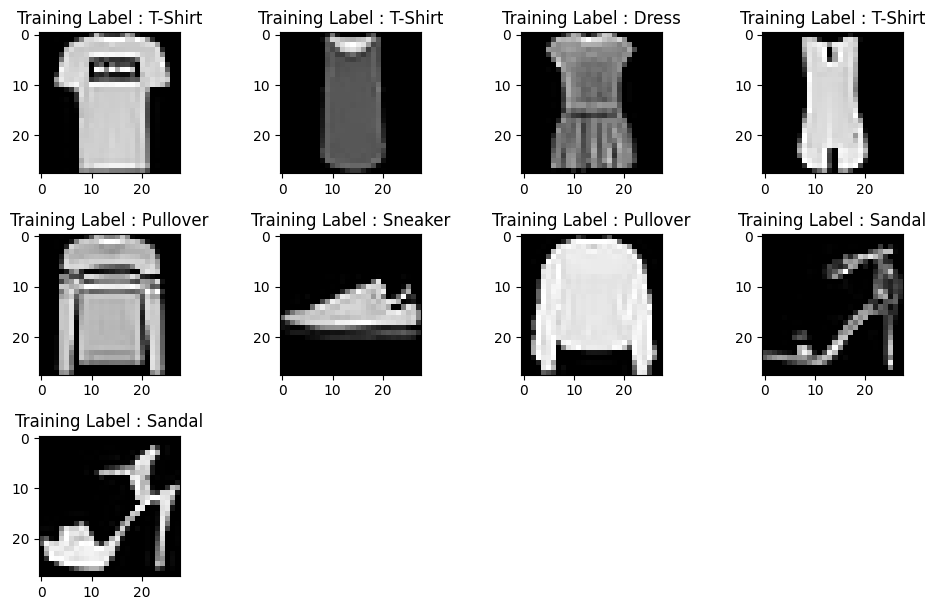

In [67]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10))
columns = 4
rows = 5
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [68]:
input_size = 784
out_size = 10

In [79]:
## Define the model
################ Your code ############
model = nn.Sequential(
    nn.Linear(784, 10).to(device),
    nn.Softmax().to(device),
)
#######################################

In [80]:
################ Your code ############
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
#######################################

In [81]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): Softmax(dim=None)
)


In [82]:
## Train your model
epochs = 10
model.train()

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1).to(device)
    labels = labels.to(device)
    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8653564706031702
Training loss: 1.7447037923056434
Training loss: 1.7242408940024467
Training loss: 1.7140552939128266
Training loss: 1.7072855917883833
Training loss: 1.6976045861935565
Training loss: 1.6603745103899095
Training loss: 1.6509570400597953
Training loss: 1.6459097707195323
Training loss: 1.6421604903776255


In [14]:
## Test your model


def test_model(model, testloader):

    model.eval()
    correct = 0
    total = 0
    sample_images = []
    sample_labels = []
    sample_preds = []

    with torch.no_grad():
        for i, data in enumerate(testloader):
            images, labels = data

            images = torch.squeeze(images).view(images.shape[0], -1).to(device)

            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if i < 10:  # collect first 10 samples
                sample_images.append(images[0])
                sample_labels.append(labels[0])
                sample_preds.append(predicted[0])

    print('Accuracy of the network on test images: %d %%' % (100 * correct / total))

    return sample_images, sample_labels, sample_preds


In [84]:
sample_images, sample_labels, sample_preds = test_model(model, testloader)

Accuracy of the network on test images: 82 %


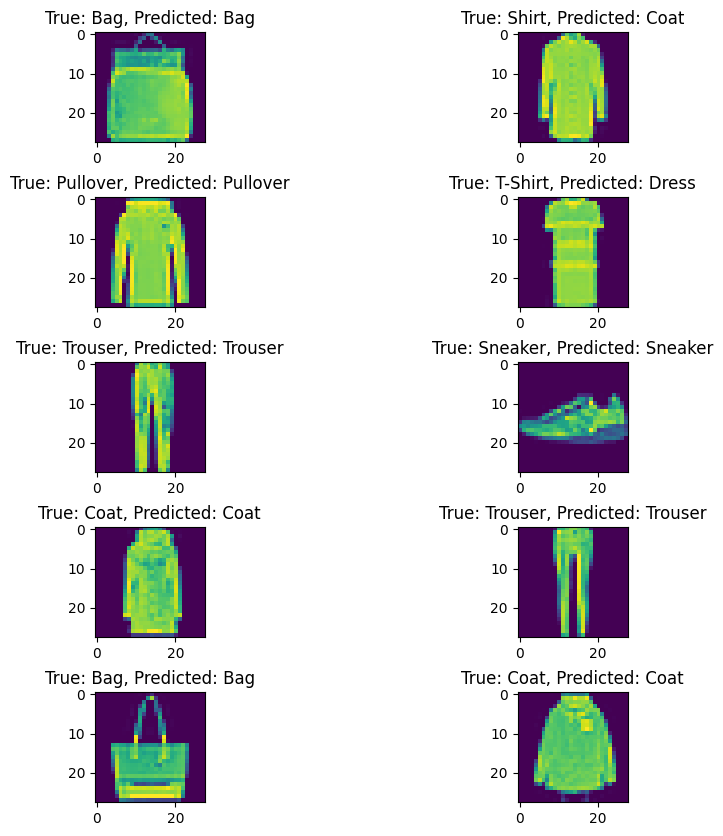

In [85]:
fig = plt.figure(figsize=(10, 10))
columns = 2
rows = 5
for i in range(10):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(sample_images[i].view(28,28).cpu().numpy())
    plt.title(f'True: {labels_map[sample_labels[i]]}, Predicted: {labels_map[sample_preds[i]]}')

plt.subplots_adjust(hspace=0.5)  # Add space between rows
plt.show()

## Part b

Sequential(
  (0): Linear(in_features=784, out_features=600, bias=True)
  (1): ReLU()
  (2): Linear(in_features=600, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=150, bias=True)
  (5): ReLU()
  (6): Linear(in_features=150, out_features=10, bias=True)
  (7): Softmax(dim=None)
)
Epoch 1/100, Loss: 1.8271, Train Accuracy: 64.96%, Validation Accuracy: 76.49%, Validation Loss: 1.7014
Epoch 2/100, Loss: 1.6672, Train Accuracy: 79.74%, Validation Accuracy: 79.20%, Validation Loss: 1.6710
Epoch 3/100, Loss: 1.6524, Train Accuracy: 81.07%, Validation Accuracy: 79.82%, Validation Loss: 1.6632
Epoch 4/100, Loss: 1.6445, Train Accuracy: 81.80%, Validation Accuracy: 80.45%, Validation Loss: 1.6567
Epoch 5/100, Loss: 1.6395, Train Accuracy: 82.27%, Validation Accuracy: 79.83%, Validation Loss: 1.6641
Epoch 6/100, Loss: 1.6363, Train Accuracy: 82.58%, Validation Accuracy: 80.81%, Validation Loss: 1.6525
Epoch 7/100, Loss: 1.6318, Train Accuracy: 83.02%, Valid

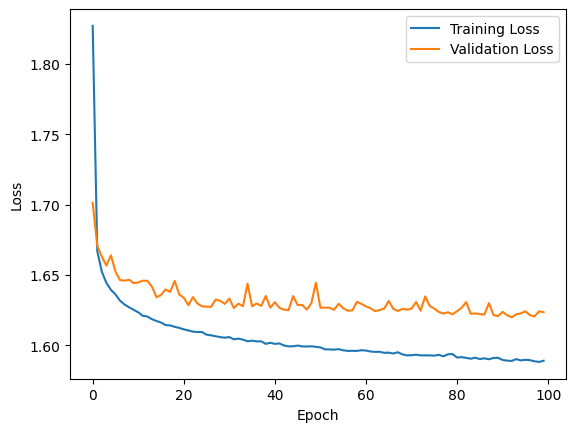

In [51]:
## Overfit the previous model

################ Your code ############
model2 = nn.Sequential(
    nn.Linear(784, 600),
    nn.ReLU(),
    nn.Linear(600, 300),
    nn.ReLU(),
    nn.Linear(300, 150),
    nn.ReLU(),
    nn.Linear(150, 10),
    nn.Softmax(),
).to(device)
#######################################

################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)
#######################################

print(model2)

## Test model
epochs = 100

# Lists to store training and validation losses for each epoch
train_losses = []
val_losses = []

for e in range(epochs):
    running_loss = 0
    correct = 0
    total = 0

    model2.train()

    for images, labels in trainloader:
        images = images.view(images.shape[0],-1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        output = model2(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total

    # Validation phase
    model2.eval()  # Set model to evaluation mode
    val_correct = 0
    val_total = 0
    val_loss = 0  # Initialize validation loss

    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(images.shape[0], -1).to(device)
            labels = labels.to(device)

            output = model2(images)
            _, predicted = torch.max(output.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            val_loss += criterion(output, labels).item()

    val_accuracy = 100 * val_correct / val_total
    avg_val_loss = val_loss / len(valloader)

    print(f"Epoch {e+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {avg_val_loss:.4f}")

    # Store losses for plotting
    train_losses.append(running_loss / len(trainloader))
    val_losses.append(avg_val_loss)

# Plotting the losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [52]:
sample_images, sample_labels, sample_preds = test_model(model2, testloader)

Accuracy of the network on test images: 83 %


## Part c

In [12]:
from torchvision import transforms

# Define a transform to normalize the data and add data augmentation
augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p = 1),
    transforms.RandomRotation((-10, 10)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load augmented training data
augmented_trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=augment_transform)
augmented_trainloader = torch.utils.data.DataLoader(augmented_trainset, batch_size= 64, shuffle=True)


# Combine original and augmented training data
combined_trainloader = torch.utils.data.DataLoader(
    torch.utils.data.ConcatDataset([trainset, augmented_trainset]),
    batch_size=64, shuffle=True)


In [6]:
len(combined_trainloader)

1875

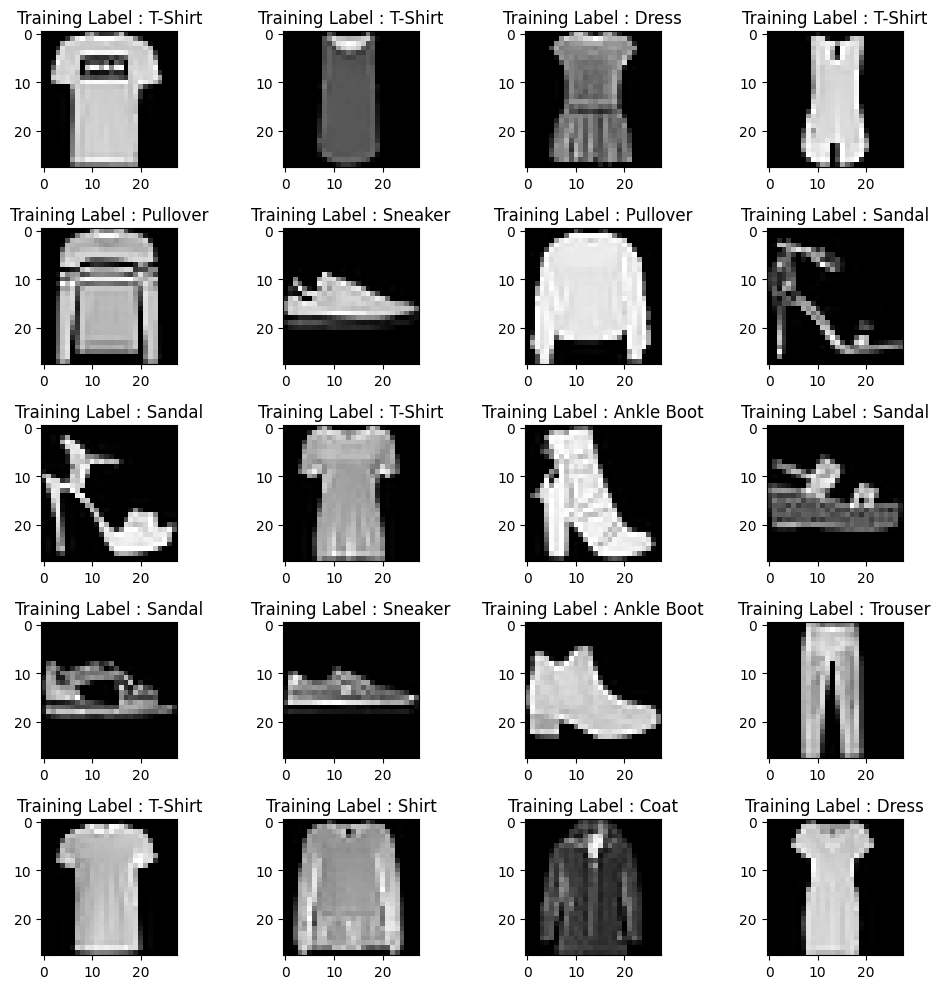

In [7]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    img, label = augmented_trainset[i]  # This applies the transform
    img = img.permute(1, 2, 0)  # Change (C, H, W) to (H, W, C)
    plt.imshow(img.numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[label])
plt.tight_layout()
plt.show()


In [17]:
# Move data loaders to GPU
combined_trainloader = [(data.to(device), target.to(device)) for data, target in combined_trainloader]

Sequential(
  (0): Linear(in_features=784, out_features=600, bias=True)
  (1): ReLU()
  (2): Linear(in_features=600, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=150, bias=True)
  (5): ReLU()
  (6): Linear(in_features=150, out_features=10, bias=True)
  (7): Softmax(dim=None)
)
Epoch 1/100, Loss: 1.7718, Train Accuracy: 70.56%, Validation Accuracy: 79.61%, Validation Loss: 1.6664
Epoch 2/100, Loss: 1.6579, Train Accuracy: 80.49%, Validation Accuracy: 79.94%, Validation Loss: 1.6628
Epoch 3/100, Loss: 1.6469, Train Accuracy: 81.51%, Validation Accuracy: 81.09%, Validation Loss: 1.6507
Epoch 4/100, Loss: 1.6401, Train Accuracy: 82.17%, Validation Accuracy: 81.33%, Validation Loss: 1.6472
Epoch 5/100, Loss: 1.6347, Train Accuracy: 82.71%, Validation Accuracy: 81.12%, Validation Loss: 1.6500
Epoch 6/100, Loss: 1.6311, Train Accuracy: 83.05%, Validation Accuracy: 81.16%, Validation Loss: 1.6491
Epoch 7/100, Loss: 1.6282, Train Accuracy: 83.34%, Valid

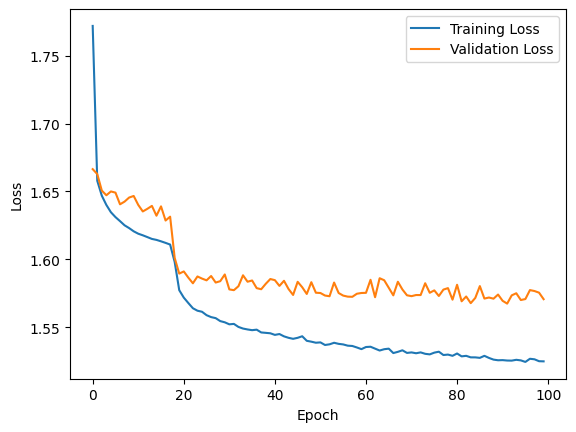

In [11]:
## Training using augmanted data

# Plot the images
################ Your code ############
model3 = nn.Sequential(
    nn.Linear(784, 600),
    nn.ReLU(),
    nn.Linear(600, 300),
    nn.ReLU(),
    nn.Linear(300, 150),
    nn.ReLU(),
    nn.Linear(150, 10),
    nn.Softmax(),
).to(device)
#######################################

################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)
#######################################

print(model3)

## Test model
epochs = 100

# Lists to store training and validation losses for each epoch
train_losses = []
val_losses = []

for e in range(epochs):
    running_loss = 0
    correct = 0
    total = 0

    model3.train()

    for images, labels in combined_trainloader:
        images = images.view(images.shape[0],-1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        output = model3(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total

    # Validation phase
    model3.eval()  # Set model to evaluation mode
    val_correct = 0
    val_total = 0
    val_loss = 0  # Initialize validation loss

    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(images.shape[0], -1).to(device)
            labels = labels.to(device)

            output = model3(images)
            _, predicted = torch.max(output.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            val_loss += criterion(output, labels).item()

    val_accuracy = 100 * val_correct / val_total
    avg_val_loss = val_loss / len(valloader)

    print(f"Epoch {e+1}/{epochs}, Loss: {running_loss/len(combined_trainloader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {avg_val_loss:.4f}")

    # Store losses for plotting
    train_losses.append(running_loss / len(combined_trainloader))
    val_losses.append(avg_val_loss)

# Plotting the losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# test new model

result = test_model(model3, testloader)

Accuracy of the network on test images: 89 %


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


## part D

Sequential(
  (0): Linear(in_features=784, out_features=600, bias=True)
  (1): ReLU()
  (2): Linear(in_features=600, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=150, bias=True)
  (5): ReLU()
  (6): Linear(in_features=150, out_features=10, bias=True)
  (7): Softmax(dim=None)
)
Epoch 1/100, Loss: 1.7754, Train Accuracy: 70.21%, Validation Accuracy: 79.37%, Validation Loss: 1.6693
Epoch 2/100, Loss: 1.6658, Train Accuracy: 79.72%, Validation Accuracy: 79.95%, Validation Loss: 1.6624
Epoch 3/100, Loss: 1.6531, Train Accuracy: 80.95%, Validation Accuracy: 80.13%, Validation Loss: 1.6602
Epoch 4/100, Loss: 1.6465, Train Accuracy: 81.58%, Validation Accuracy: 81.49%, Validation Loss: 1.6464
Epoch 5/100, Loss: 1.6411, Train Accuracy: 82.13%, Validation Accuracy: 81.55%, Validation Loss: 1.6450
Epoch 6/100, Loss: 1.6369, Train Accuracy: 82.52%, Validation Accuracy: 81.90%, Validation Loss: 1.6427
Epoch 7/100, Loss: 1.6334, Train Accuracy: 82.86%, Valid

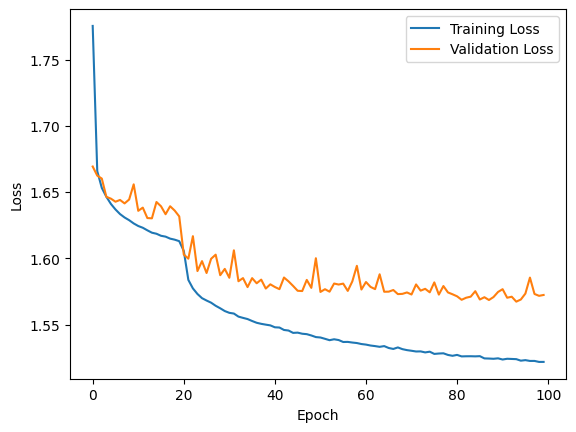

In [22]:
## Training using augmanted data

# Plot the images
################ Your code ############
model4 = nn.Sequential(
    nn.Linear(784, 600),
    nn.ReLU(),
    nn.Linear(600, 300),
    nn.ReLU(),
    nn.Linear(300, 150),
    nn.ReLU(),
    nn.Linear(150, 10),
    nn.Softmax(),
).to(device)
#######################################

################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model4.parameters(), lr=0.1, weight_decay=1e-4)
#######################################

print(model4)

## Test model
epochs = 100

# Lists to store training and validation losses for each epoch
train_losses = []
val_losses = []

for e in range(epochs):
    running_loss = 0
    correct = 0
    total = 0

    model4.train()

    for images, labels in combined_trainloader:
        images = images.view(images.shape[0],-1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        output = model4(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total

    # Validation phase
    model4.eval()  # Set model to evaluation mode
    val_correct = 0
    val_total = 0
    val_loss = 0  # Initialize validation loss

    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(images.shape[0], -1).to(device)
            labels = labels.to(device)

            output = model4(images)
            _, predicted = torch.max(output.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            val_loss += criterion(output, labels).item()

    val_accuracy = 100 * val_correct / val_total
    avg_val_loss = val_loss / len(valloader)

    print(f"Epoch {e+1}/{epochs}, Loss: {running_loss/len(combined_trainloader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {avg_val_loss:.4f}")

    # Store losses for plotting
    train_losses.append(running_loss / len(combined_trainloader))
    val_losses.append(avg_val_loss)

# Plotting the losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## E

Sequential(
  (0): Linear(in_features=784, out_features=600, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=600, out_features=300, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=300, out_features=150, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.1, inplace=False)
  (9): Linear(in_features=150, out_features=10, bias=True)
  (10): Softmax(dim=None)
)
Epoch 1/100, Loss: 2.2457, Train Accuracy: 24.52%, Validation Accuracy: 51.16%, Validation Loss: 2.0458
Epoch 2/100, Loss: 1.9145, Train Accuracy: 58.16%, Validation Accuracy: 66.17%, Validation Loss: 1.8075
Epoch 3/100, Loss: 1.8057, Train Accuracy: 66.59%, Validation Accuracy: 69.92%, Validation Loss: 1.7656
Epoch 4/100, Loss: 1.7542, Train Accuracy: 72.55%, Validation Accuracy: 75.82%, Validation Loss: 1.7126
Epoch 5/100, Loss: 1.7205, Train Accuracy: 75.07%, Validation Accuracy: 76.93%, Validation Loss: 1.6966
Epoch 6/100, Loss: 1.7061, Train Accuracy: 76.23

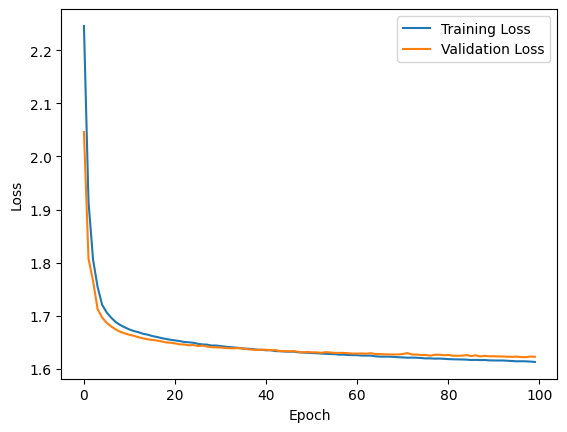

In [21]:
## Training using augmanted data

# Plot the images
################ Your code ############
model5 = nn.Sequential(
    nn.Linear(784, 600),
    nn.ReLU(),
    nn.Dropout(p = 0.5),
    nn.Linear(600, 300),
    nn.ReLU(),
    nn.Dropout(p = 0.3),
    nn.Linear(300, 150),
    nn.ReLU(),
    nn.Dropout(p = 0.1),
    nn.Linear(150, 10),
    nn.Softmax(),
).to(device)
#######################################

################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model5.parameters(), lr=0.01, weight_decay=1e-4)
#######################################

print(model5)

## Test model
epochs = 100

# Lists to store training and validation losses for each epoch
train_losses = []
val_losses = []

for e in range(epochs):
    running_loss = 0
    correct = 0
    total = 0

    model5.train()

    for images, labels in combined_trainloader:
        images = images.view(images.shape[0],-1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        output = model5(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total

    # Validation phase
    model5.eval()  # Set model to evaluation mode
    val_correct = 0
    val_total = 0
    val_loss = 0  # Initialize validation loss

    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(images.shape[0], -1).to(device)
            labels = labels.to(device)

            output = model5(images)
            _, predicted = torch.max(output.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            val_loss += criterion(output, labels).item()

    val_accuracy = 100 * val_correct / val_total
    avg_val_loss = val_loss / len(valloader)

    print(f"Epoch {e+1}/{epochs}, Loss: {running_loss/len(combined_trainloader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {avg_val_loss:.4f}")

    # Store losses for plotting
    train_losses.append(running_loss / len(combined_trainloader))
    val_losses.append(avg_val_loss)

# Plotting the losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()